## Protein Sequence Classification with Machine Learning

In this notebook, I will apply a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df_acp = pd.read_csv('data/acp/train_data.csv', header=0) # reading the training dataset for acp
df_acp_test = pd.read_csv('data/acp/test_data.csv', header=0) # reading the test dataset for acp

In [3]:
df_acp_01 = df_acp[df_acp['label'] == 1]
df_acp_01['class'] = 1
df_acp_01.head()

/tmp/ipykernel_2132/2050715675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acp_01['class'] = 1


,sequences,label,class
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1,1
3,GLFDVIKKVAAVIGGL,1,1
4,VAKLLAKLAKKVL,1,1
6,FLPLLASLFSRLL,1,1
7,WFKKIPKFLHLAKKF,1,1


In [4]:
df_acp_01 = df_acp_01.drop(columns=['label'])
df_acp_01.head()

,sequences,class
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1
6,FLPLLASLFSRLL,1
7,WFKKIPKFLHLAKKF,1


In [5]:
df_amp = pd.read_csv('data/amp/all_data.csv', header=0) # reading the training dataset for amp
df_amp_test = pd.read_csv('data/amp/all_data.csv', header=1) # reading the test dataset for amp

In [6]:
df_amp.sample(5)

,PDBs_code,SequenceID,label
3033,UniRef50_Q8N427,CDFEEFVSFMTSGLSYI,0
1571,AP00560,TTLTLHNLCPYPVWWLVTPNNGGFPIIDNTPVVLG,1
3556,UniRef50_P32357,ADNSSMRYGYWFDCRMGNFYIQYDPKDGLYKMMEERDGAKFENIVH...,0
174,AP03153,MRLSHVCSQSSSKYPAGSCNLMTHDRATSSEHRSASRCDRVIRRFC...,1
261,AP00189,VSCTCRRFSCGFGERASGSCTVNGVRHTLCCRR,1


In [7]:
df_amp_01 = df_amp[df_amp['label'] == 1]
df_amp_01['class'] = 2
df_amp_01.head()

/tmp/ipykernel_2132/1953546382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amp_01['class'] = 2


,PDBs_code,SequenceID,label,class
0,AP02484,GMASKAGSVLGKITKIALGAL,1,2
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,2
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1,2
3,AP02983,FFGRLKAVFRGARQGWKEHRY,1,2
4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1,2


In [8]:
df_amp_01 = df_amp_01.drop(columns=['PDBs_code','label'])
df_amp_01.head()

,SequenceID,class
0,GMASKAGSVLGKITKIALGAL,2
1,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,2
2,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,2
3,FFGRLKAVFRGARQGWKEHRY,2
4,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,2


In [9]:
df_dna = pd.read_csv('data/dna_binding/train.csv', header=0) # reading the training dataset for dna
df_dna_test = pd.read_csv('data/dna_binding/test.csv', header=0) # reading the test dataset for dna

In [10]:
df_dna.sample(5)

,code,sequence,label,origin
8540,P0DE00,MAKKVEKLVKLQIPAGKATPAPPVGPALGQAGINIMGFTKEFNART...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1801,P35251,MDIRKFFGVIPSGKKLVSETVKKNEKTKSDEETLKAKKGIKEIKVN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
10361,Q67ER4,MAEQLSPGKTTDQVCTFLFKKPGRKVAAGRRKRPICNQESGDSSSS...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
6157,P17487,MMFSSIDSLLKISTSSQNEDQKLESHPSPPSQIPNYSTSCSEELMK...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
11107,P08075,MKALVLAGGTGTRLRPITHTSAKQLVPVANKPVLFYGLEAIRAAGI...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [11]:
df_dna_01 = df_dna[df_dna['label'] == 1]
df_dna_01['class'] = 3
df_dna_01.head()

/tmp/ipykernel_2132/4023207538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dna_01['class'] = 3


,code,sequence,label,origin,class
0,Q6A8L0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...,3
1,Q7V7T9,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...,3
2,Q9ZUP2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...,3
3,Q2JVG1,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...,3
4,Q9K4Q3,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...,3


In [12]:
df_dna_01 = df_dna_01.drop(columns=['code','label','origin'])

In [13]:
df_dna_01.head()

,sequence,class
0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,3
1,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,3
2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,3
3,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,3
4,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,3


`All dataset combined`

In [14]:
# df_all_dataset = df_acp_01 + df_amp_01 + df_dna_01
print(df_amp_01.shape)
print(df_acp_01.shape)
print(df_dna_01.shape)

(2021, 2)
(689, 2)
(7129, 2)


In [15]:
# df_amp_01.head()
df_amp_01 = df_amp_01.rename(columns={'SequenceID':'sequence'})
df_acp_01 = df_acp_01.rename(columns={'sequences':'sequence'})
print(df_amp_01.head(2))
print(df_acp_01.head(2))

                                      sequence  class
0                        GMASKAGSVLGKITKIALGAL      2
1  NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC      2
                             sequence  class
2  ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ      1
3                    GLFDVIKKVAAVIGGL      1


In [16]:
df_all_dataset = pd.concat([df_acp_01, df_amp_01, df_dna_01])
print(df_all_dataset.shape)

(9839, 2)


In [17]:
df_all_dataset.sample(5)

,sequence,class
4364,MNSNPFTKNLQNVTDPSDWEPTKLPNLKELDSLQRCYICKEFLKAP...,3
2185,MNLEGGGRGGEFGMSAVSCGNGKLRQWLIDQIDSGKYPGLVWENEE...,3
3452,MSSGDVSRRQRVSRACDECHRRKIKCDQRRPCSNCIAYNYECTYGQ...,3
3748,MASGPGSQEREGLLIVKLEEDCAWSQELPPPDPGPSPEASHLRFRR...,3
1914,YPCKLNLKLGKVPFHF,2


In [18]:
df_all_dataset.to_csv('df_all_dataset.csv')

### Definitions for the 3 classes.
- ACP
- AMP
- DNA binding

### Treating DNA sequence as a "language", otherwise known as k-mer counting

The protein sequences vary in lengths. This presents challenge in trying to create vectors of uniform length, which is a requirement for feeding data to a classification or regression algorithm. A uniform vector input may require truncating sequences or padding them with "n" or "0".

By viewing protein sequences through the lense of regular language, we can apply the machine learning algorithms used to solve regular natural language problems. In the language analogy, the genome is synonymous to a language, subsequences (genes and gene families) are sentences, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet.

In this approach, we take the long biological sequence and break it down into k-mer length overlapping "words". For example, if we use "words" of length 6 i.e. hexamers, 'ATGCATGCA' becomes: 'ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA'. This means the sequence 'ATGCATGCA' is decomposed into 4 hexamer tokens.

The token/word is arbitrary length, but should be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, these types of manipulations are referred to as "k-mer counting", or counting the occurances of each possible k-mer sequence.

### Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [19]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## Now we convert our training data sequences into short overlapping  k-mers of length 4.  Lets do that for each species of data we have using our getKmers function.

In [20]:
df_all_dataset['words'] = df_all_dataset.apply(lambda x: getKmers(x['sequence'], size=4), axis=1)
df_all_dataset = df_all_dataset.drop('sequence', axis=1)

### We change all coding sequence data to lowercase, split up into all possible k-mer words of length 4

In [21]:
df_all_dataset.sample(5)

,class,words
1297,3,"[metq, etql, tqlq, qlqn, lqnd, qndq, ndql, dql..."
643,2,"[cewy, ewyn, wyni, ynis, nisc, iscq, scql, cql..."
5877,3,"[pedi, edig, digq, igqs, gqsp, qspg, spgv, pgv..."
143,2,"[scas, casr, asrc, srck, rckg, ckgh, kghc, ghc..."
43,3,"[mvdp, vdpq, dpql, pqld, qldg, ldgp, dgpq, gpq..."


### Convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.

In [22]:
human_texts = list(df_all_dataset['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = df_all_dataset.iloc[:, 0].values                         

In [23]:
print(human_texts[2])

vakl akll klla llak lakl akla klak lakk akkv kkvl


In [24]:
y_data

array([1, 1, 1, ..., 3, 3, 3])

## We apply the BAG of WORDS using CountVectorizer using NLP

In [25]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# We use an n-gram size of 4 - needs to be empirically determined
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [26]:
print(X.shape)

(9839, 3304084)


### Visualizing class balance

<AxesSubplot: >

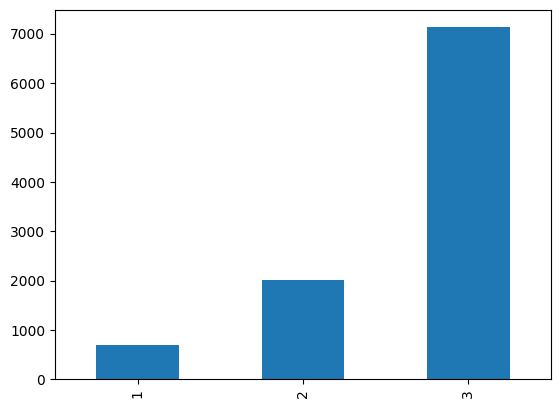

In [27]:
df_all_dataset['class'].value_counts().sort_index().plot.bar()

In [28]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)

(7871, 3304084)
(1968, 3304084)


In [35]:
X

<9839x3304084 sparse matrix of type '<class 'numpy.int64'>'
	with 3556014 stored elements in Compressed Sparse Row format>

### We create a multinomial naive Bayes classifier.  Some parameter tuning is required to determine the ngram size and alpha. We apply ngram of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1, which gave us better performance compared to other tuning values.

In [35]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter can be determined by grid search method
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [36]:
y_pred = classifier.predict(X_test)

In [ ]:
# %conda install joblib

In [2]:
import datetime
from pathlib import Path
import joblib

In [4]:
BASE_DIR = Path('model').resolve(strict=True).parent
TODAY = datetime.date.today()

In [37]:
# Dump/save model for later use
joblib.dump(classifier, Path(BASE_DIR).joinpath(f"{'proteins'}.joblib"))

['/home/chrisogonas/fourthbrain/capstone/protein/baseline/language-of-proteins/proteins.joblib']

### We view the model confusion matrix and performance metrics like accuracy, precision, recall and f1 score. Apart from Precision (Precision = TruePositives / (TruePositives + FalsePositives)) which is 81.8%, the other metrics are drastically very low. The confusion matrix reveals lots of overlaps. At this point, it is clear that the model requires further calibrations based on empirically determined hyper-parameter values, particularly on k-mer size, n-gram size, alpha, etc.

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted     1    2   3
Actual                  
1            74   68   2
2           187  212   0
3          1392   10  23
accuracy = 0.157 
precision = 0.818 
recall = 0.157 
f1 = 0.154


`REFERENCES`
- DNA Sequencing With Machine Learning - https://github.com/krishnaik06/DNA-Sequencing-Classifier